<a href="https://colab.research.google.com/github/MuzMoh/Portfolio-Projects/blob/main/Movie_EDA_and_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importing packages
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)    #Adjusts the configuration of all the plots made 

# **Preliminary Data Exploration**

In [3]:
movies = pd.read_csv('/content/drive/MyDrive/Projects/movies.csv', encoding= 'unicode_escape')
movies.shape

(7668, 15)

In [4]:
movies

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


Just from the output above, we can already find an issue with the dataset. The country in the "country" column is not the same as the country in the "released" column. 

In [5]:
movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
movies.isnull().sum().sort_values()

name           0
genre          0
year           0
director       0
star           1
released       2
score          3
votes          3
writer         3
country        3
runtime        4
company       17
rating        77
gross        189
budget      2171
dtype: int64

***Dataset description***

*   budget: the budget of a movie, some movies don't have this, so it appears as 0

*   company: the production company

*   country: country of origin

*   director: the director

*   genre: main genre of the movie

*   gross: revenue of the movie

*   name: name of the movie

*   rating: rating of the movie (R, PG, etc.)

*   released: release date (YYYY-MM-DD)

*   runtime: duration of the movie

*   score: IMDb user rating (higher means good movie)

*   votes: number of user votes

*   star: main actor/actress

*   writer: writer of the movie


*   year: year of release


(source: https://www.kaggle.com/datasets/danielgrijalvas/movies)

In [7]:
movies['rating'].unique()

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

***Movie Ratings***


*   R (Restricted) - This rating is for movies that are intended to be watched by adults, so it might not be appropriate for kids under the age of 17.

*   PG (Parental Guidance) - Parental guidance is strongly encouraged. There may be some content in this movie that parents won't find suitable for their young children.

*   G (General Audiences) - Suitable for all ages. A movie gets this rating if it doesn't contain anything that would make parents angry if their kids saw it.

*   Not Rated - Movie has not been rated by the MPAA.

*   NC-17 (No One 17 and Under Allowed) - The MPAA assigns this classification to movies that it thinks most parents will deem unsuitable for kids under the age of 17. It simply means that pornographic content is more intense than what would be in an R-rated film.

*   Approved -  Movie was approved for exhibition and was deemed moral.

*   TV-PG (Parental Guidance Suggested) - intended for younger children with an adult present. Involves some somewhat violent or sexual situations, infrequent rude language, or provocative speech.

*   PG-13 (Parents Strongly Cautioned) - Some content might not be appropriate for those under the age of 13. Although it does not fall into the restricted R category, it may contain violence, nudity, sensuality, language, adult behaviors, or other aspects further than a PG rating.

*   Unrated - Movie has not been rated by the MPAA.

*   X (Restricted 18+) - comprised a buildup of language that was cruel or had sexual overtones, explicit sex, or excessive and sadistic violence. This was later replaced in 1990 by NC-17.

*   TV-MA (Mature Audience Only) - Aimed for adults, possibly inappropriate for youngsters under the age of 17. Contains potentially coarse sexual content, explicit language, or violent violence.

*   TV-14 (Parents Strongly Cautioned) - Intended for youngsters who are at least 14 years old and are with an adult. Contains potentially very sexually explicit discussion, strong crude language, violent or dramatic sexual scenarios.


(sources: https://rb.gy/nqd4zx

https://www.spectrum.net/support/tv/tv-and-movie-ratings-descriptions

https://legal-dictionary.thefreedictionary.com/X+Rating)




In [8]:
#Making sure that the X rated movies are before 1990 to ensure there is no noise
movies.loc[movies['rating'] == 'X']

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
982,Devil in the Flesh,X,Drama,1986,"May 22, 1987 (United States)",5.8,1400.0,Marco Bellocchio,Marco Bellocchio,Maruschka Detmers,Italy,NaN,546904.0,L.P. Film,114.0
1065,Angel Heart,X,Horror,1987,"March 6, 1987 (United States)",7.3,83000.0,Alan Parker,William Hjortsberg,Mickey Rourke,United Kingdom,17000000.0,17186348.0,Carolco International N.V.,113.0
1476,"The Cook, the Thief, His Wife & Her Lover",X,Crime,1989,"April 6, 1990 (United States)",7.6,36000.0,Peter Greenaway,Peter Greenaway,Richard Bohringer,Netherlands,NaN,7724701.0,Allarts,124.0


Another issue that can be seen from the output baove is that the year in the "year" column is not the same as the year in the "released" column.

# **Data Cleaning**

In [9]:
#Using a copy of the dataset to work with
df = movies.copy()

In [10]:
df['runtime'].unique()

array([146., 104., 124.,  88.,  98.,  95., 133., 129., 127., 100., 116.,
       109., 114., 103., 134.,  89., 111., 102., 219.,  96., 132., 115.,
       131., 117.,  92.,  97.,  91., 101.,  84., 107.,  99.,  82.,  94.,
       173., 139., 121., 123., 119.,  93., 150.,  86.,  75., 106., 112.,
       108.,  83., 105., 113.,  85., 118., 140., 149., 110.,  87., 126.,
       195., 125., 122., 155.,  90., 167.,  78., 120., 191., 188., 136.,
       128.,  74.,  80., 170., 193.,  81.,  77.,  79., 130.,  55., 137.,
       229., 160., 145., 138., 141., 164., 143., 153., 187., 154., 162.,
       161., 144.,  72., 185.,  76., 163., 157., 135., 357.,  69., 168.,
       171., 142., 175., 181., 158., 189., 238., 156., 202., 182., 180.,
       271.,  71., 159., 178., 192., 176., 147., 242., 194., 177., 169.,
       151., 172., 148.,  73., 165., 186., 152., 183., 224., 210., 179.,
       201., 366., 166.,  nan,  63., 196., 209.])

In [11]:
#Votes column is float type, doesn't need to be as there is no such thing as half a vote
df['votes'] = df['votes'].astype('Int64')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [12]:
#Runtime column is float type, doesn't need to be as there are no values with half a minute
df['runtime'] = df['runtime'].astype('Int64')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98


In [13]:
#I noticed that some of the release dates and the year dates aren't matching, so I decided 
#to create a new column to extract the year from the release column to make it correct
#Additonally, I wanted to separate the release country into a column of its own
year_country = df['released'].str.replace(")","").str.split("(",expand=True).rename(columns={0:'correct_year', 1:'release_country'})

<ipython-input-13-d2200d2f703f>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  year_country = df['released'].str.replace(")","").str.split("(",expand=True).rename(columns={0:'correct_year', 1:'release_country'})


In [14]:
df.insert(6,'year_correct',year_country['correct_year'])
df.insert(7,'release_country',year_country['release_country'])

In [15]:
#Here, I am just removing the day and month as they are not that important
df['year_correct'] = df['year_correct'].astype(str).astype('datetime64')
df.head()

,name,rating,genre,year,released,score,year_correct,release_country,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,1980-06-13,United States,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,1980-07-02,United States,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1980-06-20,United States,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,1980-07-02,United States,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,1980-07-25,United States,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98


In [16]:
#Deleting the year, released and country columns as they are no longer necessary
df = df.drop(columns = ['year', 'released', 'country'])
df.head()

,name,rating,genre,score,year_correct,release_country,votes,director,writer,star,budget,gross,company,runtime
0,The Shining,R,Drama,8.4,1980-06-13,United States,927000,Stanley Kubrick,Stephen King,Jack Nicholson,19000000.0,46998772.0,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,5.8,1980-07-02,United States,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,4500000.0,58853106.0,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1980-06-20,United States,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,18000000.0,538375067.0,Lucasfilm,124
3,Airplane!,PG,Comedy,7.7,1980-07-02,United States,221000,Jim Abrahams,Jim Abrahams,Robert Hays,3500000.0,83453539.0,Paramount Pictures,88
4,Caddyshack,R,Comedy,7.3,1980-07-25,United States,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,6000000.0,39846344.0,Orion Pictures,98


In [17]:
df.dtypes

name                       object
rating                     object
genre                      object
score                     float64
year_correct       datetime64[ns]
release_country            object
votes                       Int64
director                   object
writer                     object
star                       object
budget                    float64
gross                     float64
company                    object
runtime                     Int64
dtype: object

In [18]:
#Checking for duplicate values
df.duplicated().value_counts()

False    7668
dtype: int64

In [19]:
#Checking for null values
df.isnull().sum().sort_values()

name                  0
genre                 0
director              0
star                  1
year_correct          2
release_country       2
score                 3
votes                 3
writer                3
runtime               4
company              17
rating               77
gross               189
budget             2171
dtype: int64

In [20]:
# Replacing string NAN values with actual NAN value (np.nan)
def convert_to_nan(df):
    n_col = df.shape[1]
    for index in range(n_col):
        df.iloc[:, index]  = df.iloc[:, index].replace("NAN", np.nan)
    return df

df = convert_to_nan(df)

In [21]:
#Checking percentage of missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
score - 0%
year_correct - 0%
release_country - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [22]:
#Checking for null values
df.isnull().sum().sort_values()

name                  0
genre                 0
director              0
star                  1
year_correct          2
release_country       2
score                 3
votes                 3
writer                3
runtime               4
company              17
rating               77
gross               189
budget             2171
dtype: int64

Based on the results above, we can see that 12 columns have missing data, 1 is datetime64 datatype (year_correct), 5 are object datatype (star, release_country, writer, company and rating), 2 are int64 datatype (votes and runtime) and 3 are float64 datatype (score, gross and budget).
The way that I will be dealing with this is in the following ways:

1.   For the object datatype columns, I will fill them in with "Other"
2.   For the float64 datatype columns, I will use the mean of the column to impute in the missing data

3.   For the int64 datatype columns, I will fill them in with "0"
4.   For the datetime64 datatype column, I will fill it in with "0000-00-00" 




In [23]:
columns_1 = ['star','release_country','writer','company','rating']
for i in columns_1:
    df[i].fillna("Other", inplace = True)

columns_2 = ['runtime','votes']
for j in columns_2:
    df[j].fillna(0, inplace = True) 

columns_3 = ['score','budget','gross']
for k in columns_3:
    df[k].fillna(round(np.mean(df[k])), inplace = True)

df['year_correct'].fillna('0000-00-00',inplace=True)

In [24]:
#Rechecking for null values
df.isnull().sum().sort_values()

name               0
rating             0
genre              0
score              0
year_correct       0
release_country    0
votes              0
director           0
writer             0
star               0
budget             0
gross              0
company            0
runtime            0
dtype: int64

# **Data Visualisation**

Text(0.5, 1.0, 'Average Movie Rating of Each Genre')

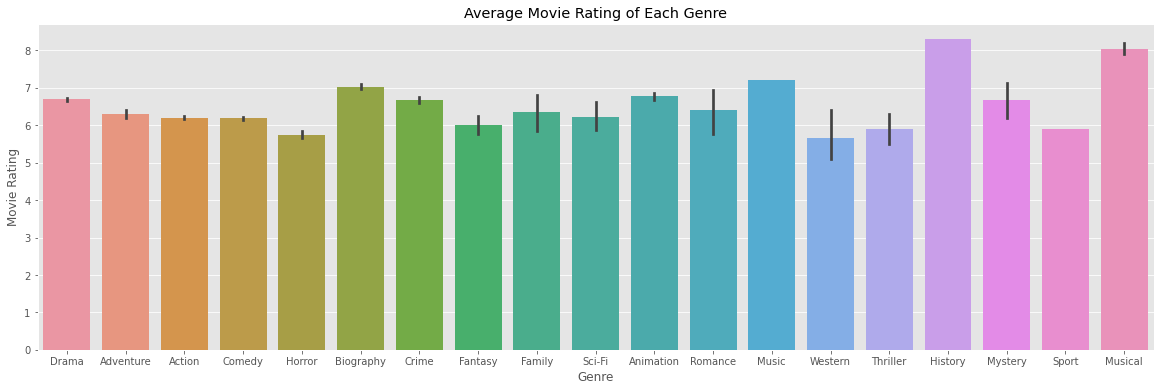

In [25]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x='genre', y='score', data=df, ax=ax)
plt.xlabel('Genre')
plt.ylabel('Movie Rating')
plt.title('Average Movie Rating of Each Genre')

Due to their propensity to be well-liked, entertaining, and frequently having a broad appeal, the historical and musical genres consistently receive some of the top ratings. History and music both have the power to unite people through the sharing of stories from various cultures and historical periods. People can also study about history and get understanding of other cultures and historical events. People can bond over a shared experience through music and find solace from the stresses of daily life. On the other hand, western movies to have the lowest ratings because they mainly relate to the United States or its history and that isn't found very appealing for international audiences. The genre hit its peak in the 1950-1960s and since then has found it difficult to come back to the top. This is more evident as there are less and less western movies being produced in the past few years.

(source: https://screenculturejournal.com/2017/04/the-decline-in-popularity-of-the-western-film-genre/)

Text(0.5, 1.0, 'List of Genres with the Highest Viewership')

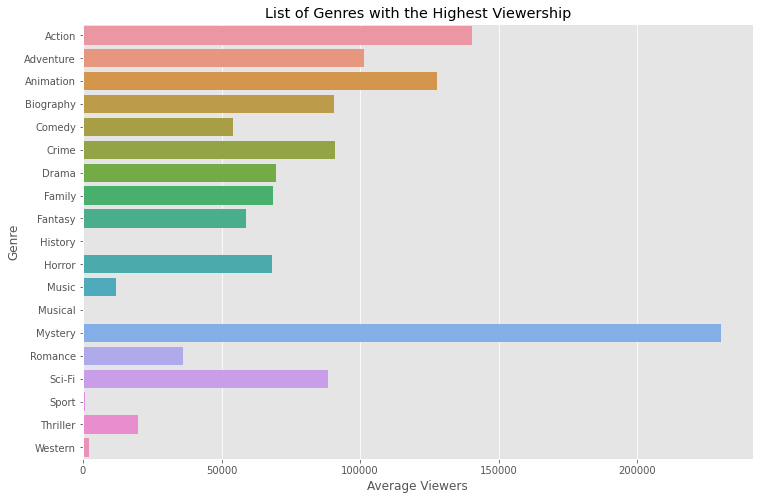

In [26]:
data = df.groupby('genre')['votes'].agg({'mean'}).reset_index().rename(columns={'mean':'views'})
sns.barplot(x='views',y='genre',data=data)
plt.xlabel('Average Viewers')
plt.ylabel('Genre')
plt.title('List of Genres with the Highest Viewership')

The most popular movie genre is the mystery genre and this is because they prey on our human instinct to look for answers to questions.  Even while it can be frustrating to not be able to predict what will happen next, we enjoy it when a crime thriller defies logic. Better yet, if the mystery film has you on the edge of your seat right up to the very end.
The film industry's most popular genres include action and animation because they offer audiences a thrilling, enjoyable, and engaging experience. While animation films offer viewers a sense of levity and escape, action films provide them with an exhilarating experience and a sense of excitement. 

Text(0.5, 1.0, 'Top 10 Highest Viewed Movies')

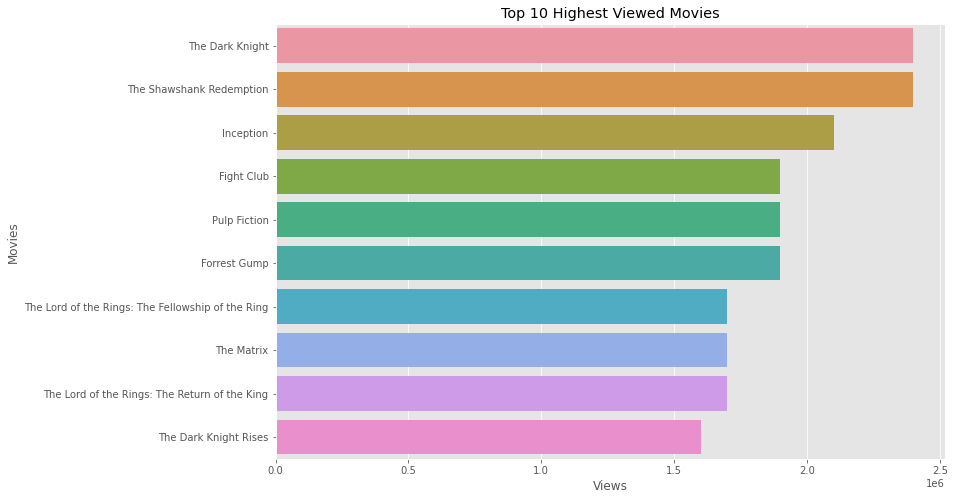

In [27]:
data = df.groupby('name')['votes'].agg({'sum'}).reset_index().rename(columns={'sum':'views'})
sns.barplot(y='name',x='views',data = data.sort_values(by='views',ascending=False).head(10))
plt.ylabel('Movies')
plt.xlabel('Views')
plt.title('Top 10 Highest Viewed Movies')

Shawshank Redemption and The Dark Night is the most popular films in the film industry. Shawshank Redemption and The Dark Knight are two of the most popular films in the film industry because they offer viewers a unique and powerful viewing experience.The Shawshank Redemption's tale of justice, hope, friendship and humanity transcends genre and age, while bridging the divide between the mainstream and hardcore film buffs. These themes age far better than most films manage, making them timeless and enjoyable years after they were released. As for the Dark Knight, it is widely considered one of the best superhero movies of all time due to its portrayal of the villian and the hero, with one of the greatest performances of all time considered to be Heath Ledger's portrayal of the Joker. For his depiction of the Clown Prince of Crime, Ledger received the Academy Award for Best Supporting Actor after his passing.

Text(0.5, 1.0, 'Top 5 Highest Grossing Movies')

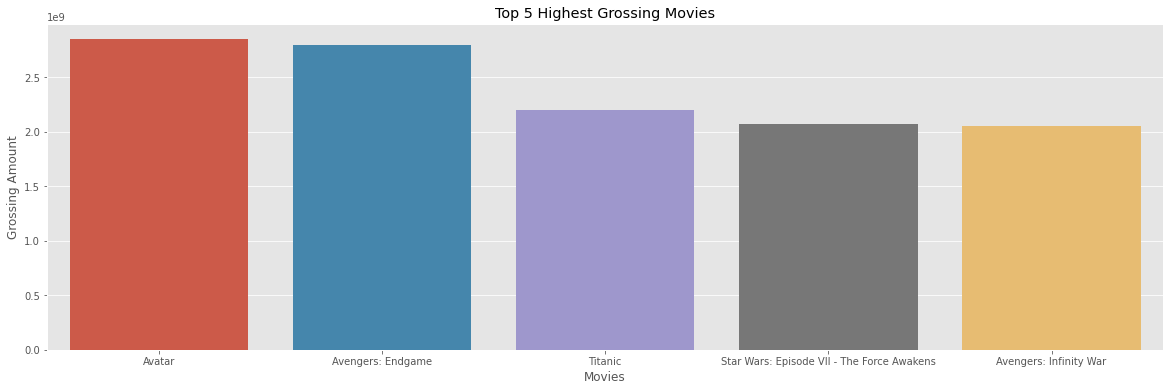

In [28]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x='name',y='gross',data=df.sort_values(by='gross',ascending=False).head(), ax=ax)
plt.xlabel('Movies')
plt.ylabel('Grossing Amount')
plt.title('Top 5 Highest Grossing Movies')

The top 5 highest grossing movies of all time are Avatar and Avengers: Endgame, with both having quite similar gross amounts, followed by Titanic, Star Wars VII - The Force Awakens and Avengers: Infinity War.
James Cameron's Avatar, which is now the highest-grossing movie ever, is the holder of numerous box office records. It became the first movie to collect more than $2 billion in 2009 and finished its initial theatrical run with total receipts of $2.749 billion. The movie also set records for biggest domestic opening weekend for independent cinema and biggest opening weekend for an ecological movie. The enormous box office hit was surpassed as the highest-grossing movie in 2019 by Avengers: Endgame, which earned $2.797 billion worldwide. Avatar regained its title and established itself with a cumulative gross of $2.847 billion, albeit, after a 2021 re-release of the movie in China.

(source: https://movieweb.com/avatar-highest-grossing-movie/)

Text(0.5, 1.0, 'Average Budget of Each Genre')

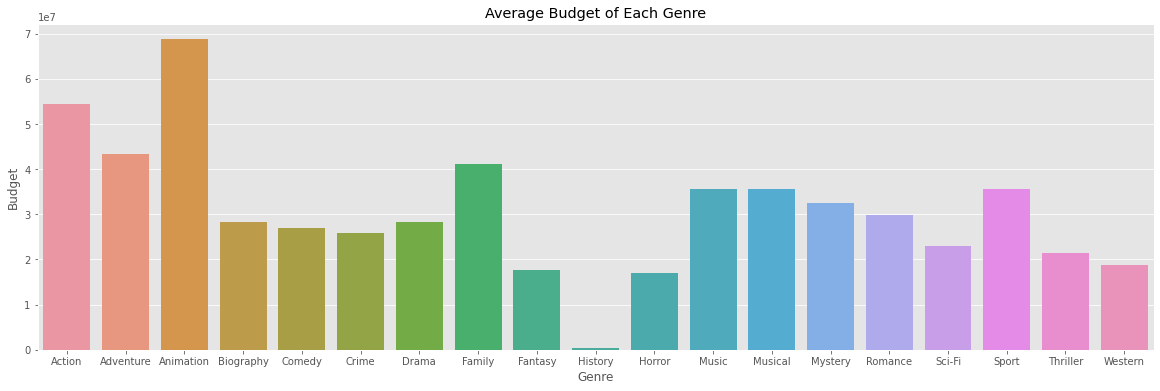

In [29]:
fig, ax = plt.subplots(figsize=(20, 6))
data = df.groupby('genre')['budget'].agg({'mean'}).reset_index().rename(columns={'mean':'avg_budget'})
sns.barplot(x='genre', y='avg_budget', data=data, ax=ax)
plt.xlabel('Genre')
plt.ylabel('Budget')
plt.title('Average Budget of Each Genre')

The average budget of an animated movie is just under 70 million dollars, making that the genre with the highest budget. An animation movie frame might include millions of moving pieces. There were 2,320,413 uniquely named hairs on the body of the Sully character from Monsters, Inc. Each hair on his body must be animated when he moves in order to produce a highly realistic effect. According to WebPro News, a single frame involving Sully required 11–12 hours of creative effort on average. Additionally, animation requires a lot of computational power. For the moving pieces to be integrated, each frame must be drawn separately.
This is followed by action, with an average budget of around 53 million dollars. They involve a lot of special effects, detailed sets, and stunt work and these types of movies also have a star-studded cast.

(source: https://rb.gy/bg97tz)

Text(0.5, 1.0, 'Top 10 Directors In The Movie Industry')

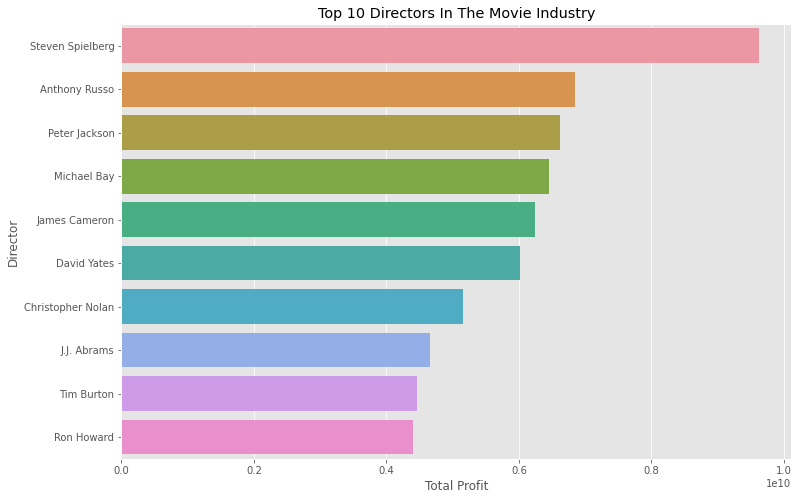

In [30]:
data = df.groupby('director')['gross'].agg({'sum'}).reset_index().rename(columns={'sum':'total_profit'})
sns.barplot(y='director',x='total_profit',data=data.sort_values(by='total_profit',ascending=False).head(10))
plt.ylabel('Director')
plt.xlabel('Total Profit')
plt.title('Top 10 Directors In The Movie Industry')

Steven Spielburh is the highest earning movie director, directing many box office movies including Jaws, Indiana Jones and the Last Crusade, Catch me if you can, Ready Player One and more recently, The Fablemans.

Text(0.5, 1.0, 'Top 5 Countries Which Produced The Most Movies')

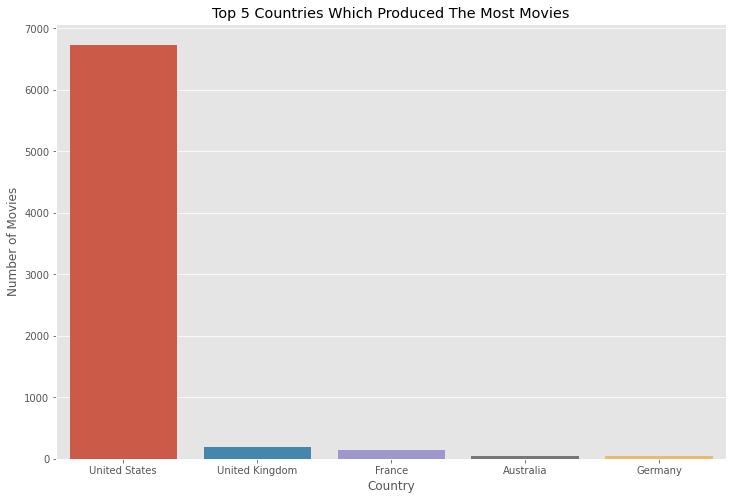

In [31]:
data = df.groupby('release_country')['name'].agg({'count'}).reset_index().rename(columns={'count':'total_number_of_films'})
sns.barplot(x='release_country',y='total_number_of_films',data=data.sort_values(by='total_number_of_films',ascending = False).head())
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.title('Top 5 Countries Which Produced The Most Movies')

American films have a ready-made international audience because English is so widely spoken worldwide. This encourages American filmmakers to release and promote their films internationally so that even non-English speakers are aware of them. Well if that were the only reason, then why doesn't the United Kingdom produce more movies?

The other aspect is how much money Hollywood spends on their films. Due to the US being the world's largest film market historically, American studios have accumulated significant cash and resources. As a result, even if they aren't always better, American films typically have a higher production value than international films, making them more appealing. They also have the money to distribute and advertise abroad, which is something smaller countries can't accomplish.

Text(0.5, 1.0, 'Top 5 Companies In Movies Industry')

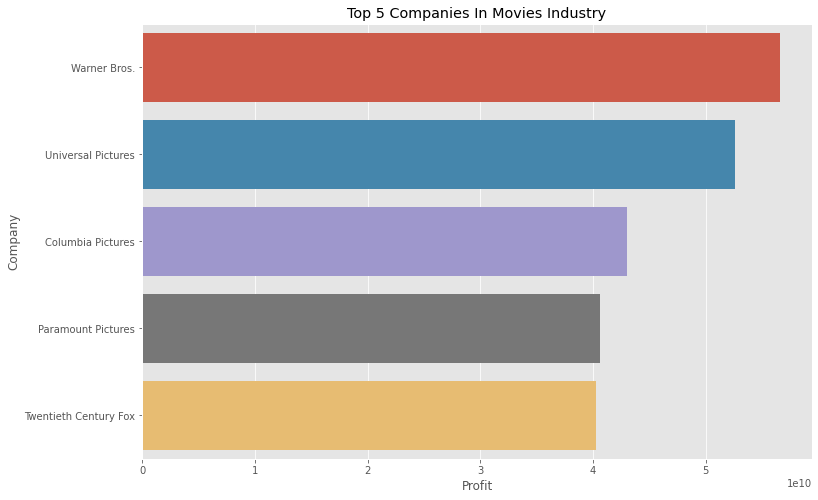

In [32]:
data = df.groupby(['company'])['gross'].agg({'sum'}).reset_index().rename(columns={'sum':'profit'})
sns.barplot(y='company',x='profit',data=data.sort_values('profit',ascending =False).head())
plt.ylabel('Company')
plt.xlabel('Profit')
plt.title('Top 5 Companies In Movies Industry')

For many years, Warner Brothers has been among the most prosperous studios in the film industry. They have regularly created some of the most enduring and popular movies ever. Some of the most adored brands, including Harry Potter, DC Comics, and The Lord of the Rings, are represented in their filmography. In addition, they produced some of the most iconic children's shows including Looney Tunes, Space Jam, Scooby Doo, Tom and Jerry, and the list goes on and on.

# **Exploring Correlation**

In this section, we will try to find any correlations in the dataset

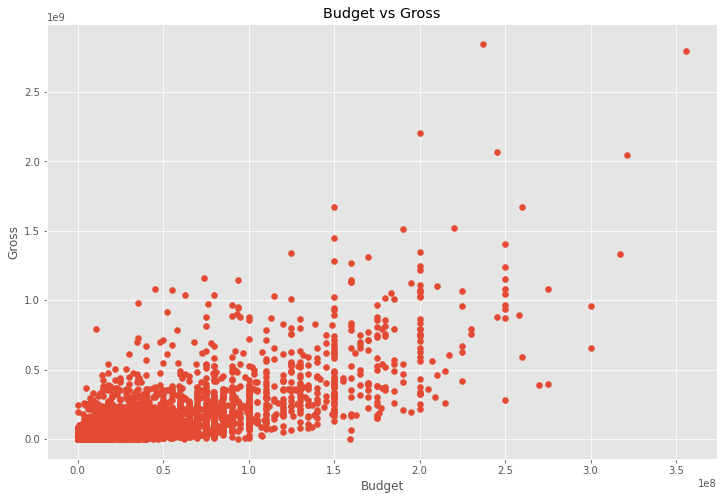

In [33]:
plt.scatter(df['budget'],df['gross'])
plt.title("Budget vs Gross")
plt.xlabel("Budget")
plt.ylabel("Gross")
plt.grid(True)
plt.show()

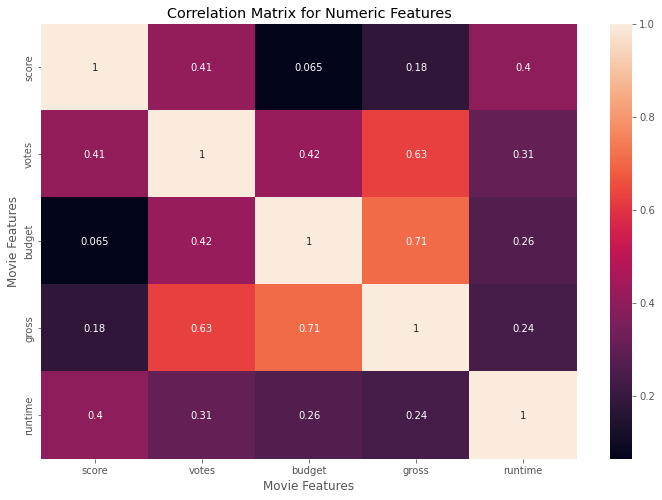

In [34]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

As we already know, correlations can only be expressed between columns of numerical datatypes, therefore the results above only show a small number of the columns. Consequently, we will need to convert all the other columns to a numerical datatype. For this, we can use one of three methods, Label Encoding, One Hot Encoding or Factorisation. Label Encoding won't work as the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them. This means that One Hot Encoding is more suitable but this also comes with a problem which is that as it generates several new variables, it is prone to causing a large problem (too many predictors) if the original column has a large number of unique values. Therefore, we will be using factorisation 

In [35]:
df[['name', 'rating', 'genre','year_correct','release_country','director','writer','star','company']] = df[['name', 'rating', 'genre','year_correct','release_country','director','writer','star','company']].apply(lambda x: pd.factorize(x)[0])

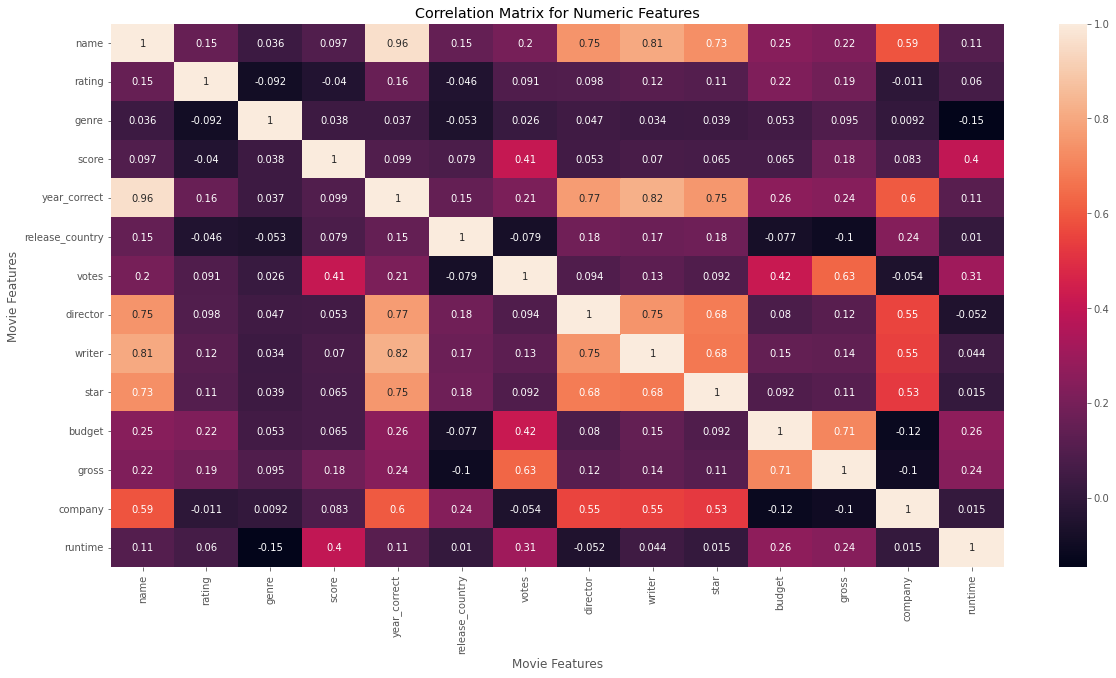

In [36]:
plt.figure(figsize=(20,10))
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In the movie industry, there is a positive correlation between budget and gross revenue, which means that as a film's budget rises, so do its gross revenues. This implies that movies with higher budgets stand a better chance of turning a bigger profit.


Since there is a correlation between budget and votes in the film industry, films with bigger budgets often receive more votes. This may be because films with larger budgets frequently have access to more advertising resources, have greater production qualities, and have better actors and directors, all of which improve a film's overall quality and raise the possibility that viewers would like it and vote for it more frequently.

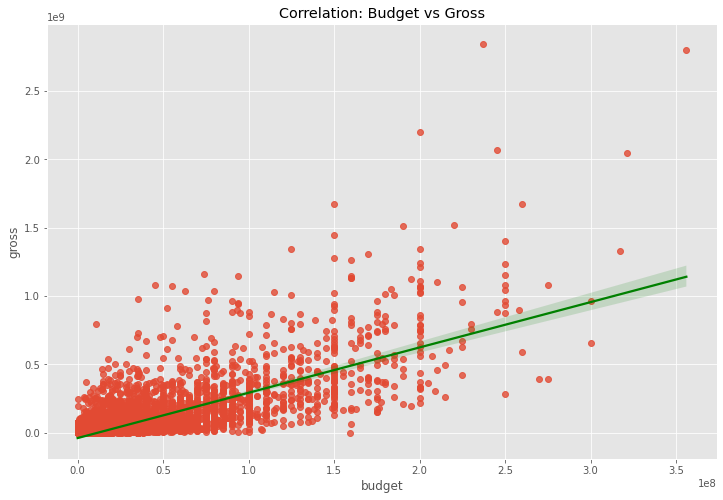

In [37]:
sns.regplot(data=df, x='budget', y='gross', line_kws={"color": "green"}).set(title='Correlation: Budget vs Gross')
plt.show()

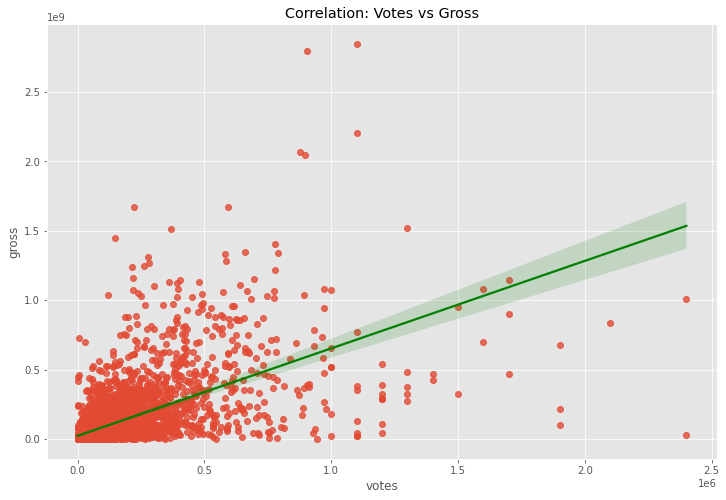

In [38]:
#I have to change votes back to float so that it can be mapped on the plot
df['votes'] = df['votes'].astype('float64')
sns.regplot(data=df, x='votes', y='gross', line_kws={"color": "green"}).set(title='Correlation: Votes vs Gross')
plt.show()

There is also a positive correlation between views and the gross of a movie because they are more widely seen and enjoyed by people, highly viewed movies typically bring in more money than other films.

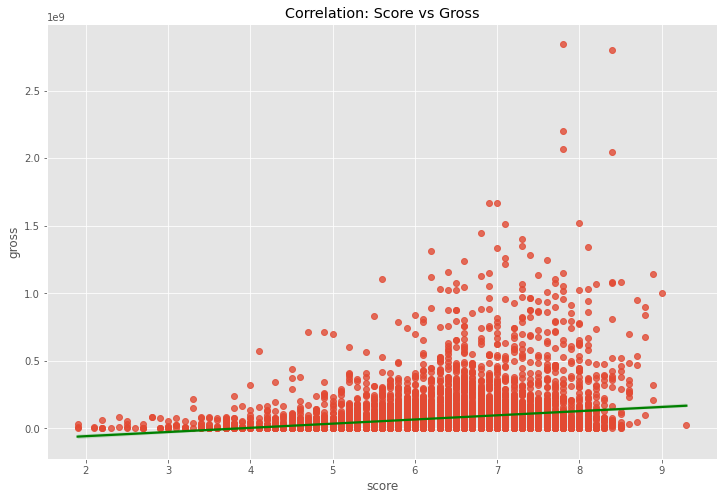

In [39]:
sns.regplot(data=df, x='score', y='gross', line_kws={"color": "green"}).set(title='Correlation: Score vs Gross')
plt.show()

As can be seen above, movies rated 6 and higher tend to have a higher gross. This is because they tend to draw greater audiences, highly rated films make more money than other films. Movies with high scores have typically received favorable reviews and are thought to be of higher quality than other films. High-scoring films will make more money since they have a larger audience because viewers are more likely to watch a movie they know is of a high quality. Also, highly rated films typically have longer runs at the box office, which means they will ultimately make more money than other films. Also, they are more likely to receive referrals from others, which boosts sales.